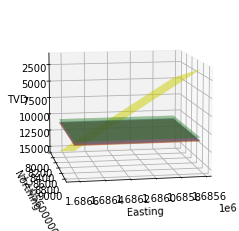

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Значения из JSON
anchor = [1686131, 20568527, 8300] # Easting, Northing, TVD
strike = 288.74813050579263 # В градусах
dip = 5.0 # Измененное значение
surfaces = {
    'Ae': 11020,
    'Ma': 11190,
    'As': 10620,
    'Hy': 11104
}

# Переводим углы из градусов в радианы
strike_rad = np.deg2rad(strike)
dip_rad = np.deg2rad(dip)

# Считаем коэффициенты плоскости разлома
a = np.sin(strike_rad) * np.cos(dip_rad)
b = np.cos(strike_rad) * np.cos(dip_rad)
c = np.sin(dip_rad)
d = -a * anchor[0] - b * anchor[1] - c * anchor[2]

# Создаем сетку точек для визуализации
x = np.linspace(anchor[0] - 500, anchor[0] + 500, 100)
y = np.linspace(anchor[1] - 500, anchor[1] + 500, 100)
X, Y = np.meshgrid(x, y)

# Вычисляем Z координату для каждой точки на плоскости
Z = (-a * X - b * Y - d) / c

# Создаем 3D график
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, color='yellow', alpha=0.5, rstride=100, cstride=100)

# Добавляем поверхности
for name, tvd in surfaces.items():
    ax.plot_surface(X, Y, np.full_like(X, tvd), label=name, alpha=0.5)

# Инвертируем ось Z
ax.invert_zaxis()

# rotate the plot
ax.view_init(10, 80)

ax.set_xlabel('Easting')
ax.set_ylabel('Northing')
ax.set_zlabel('TVD')
plt.show()
